In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import nasdaqdatalink

### Question One

Using the World Bank Indicators, download data for “GDP per capita (current US$)” and “Malnutrition prevalence, weight for age (% of children under 5).” What kind of relationship do you expect? Make a scatter plot of malnutrition prevalence against GDP per capita (using all available years and countries). What kind of relationship do you see? Make a graph for the geographical regions (six regions excluding North America and use a different color for each). Make a graph for income levels (four income levels and use a different color for each).

In [2]:
#Load the GDP data and metadata from the dowloaded files
gdp_data = pd.read_csv('Data/GDP_Per_Capita.csv', skiprows = 4, index_col=1)
gdp_metadata = pd.read_csv('Data/Metadata_Country_API_GDP_Per_Capita.csv', index_col=0)
#Drop the columns named 'Unnamed'
gdp_metadata.drop(gdp_metadata.filter(regex="Unnamed"),axis=1, inplace=True)
gdp_data.drop(gdp_data.filter(regex="Unnamed"),axis=1, inplace=True)

In [3]:
#Load the malnutrition prevalance data and metadata from the dowloaded files
ufc_data = pd.read_csv('Data/Underweight_Children_Data.csv', skiprows = 4, index_col=1)
ufc_metadata = pd.read_csv('Data/Metadata_Country_API_Underweight_Children_Data.csv', index_col=0)
#Drop the columns named 'Unnamed'
ufc_data.drop(ufc_data.filter(regex="Unnamed"),axis=1, inplace=True)
ufc_metadata.drop(ufc_metadata.filter(regex="Unnamed"),axis=1, inplace=True)

In [4]:
#Merge the GDP data and metadata dataframes into one dataframe
gdp_df = pd.merge(gdp_metadata,gdp_data,on='Country Code')
#Merge the malnutrition prevalance data and metadata dataframes into one dataframe
ufc_df = pd.merge(ufc_metadata,ufc_data,on='Country Code')

In [5]:
#Trim the GDP and malnutrition prevalance dataframes by dropping columns we will not use
gdp_df_trim = gdp_df.drop(["Region","IncomeGroup","TableName","Country Name","Indicator Name","Indicator Code","SpecialNotes"], axis=1)
ufc_df_trim = ufc_df.drop(["Region","IncomeGroup","TableName","Country Name","Indicator Name","Indicator Code","SpecialNotes"], axis=1)

In [6]:
#Use the pandas melt() function on the GDP and malnutrition prevalance dataframes
#to transpose the columns containing years into rows grouped by year
gdp_melt = gdp_df_trim.melt(ignore_index=False,var_name="Year",value_name="GDP")
ufc_melt = ufc_df_trim.melt(ignore_index=False,var_name="Year",value_name="MalnutritionData")

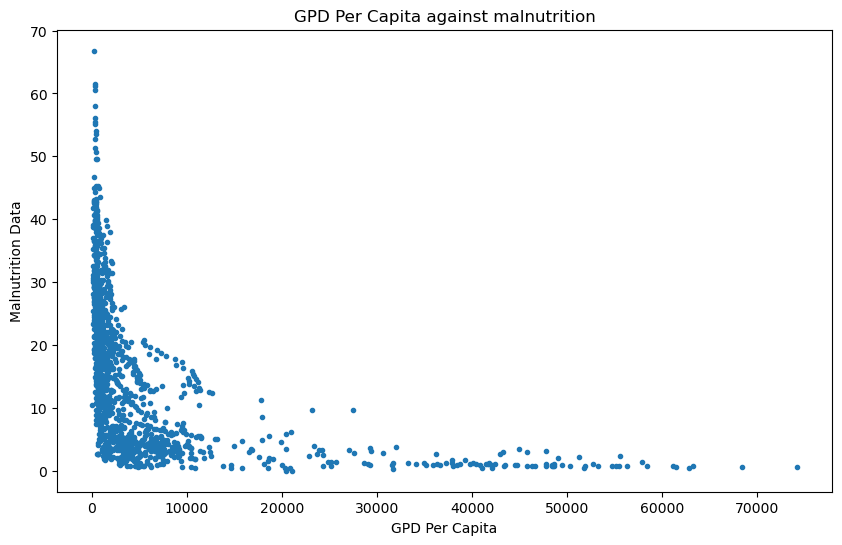

In [7]:
#Plot a scatterplot of GDP data against malnutrition data
plt.figure(figsize=(10,6))
plt.title("GPD Per Capita against malnutrition")
plt.xlabel("GPD Per Capita")
plt.ylabel("Malnutrition Data")
plt.scatter(gdp_melt['GDP'],ufc_melt['MalnutritionData'], marker='.')
plt.show()

#### Insights

Generally, malnutrition rates vary in countries with low GDP per Capita. Several countries have low malnutrition rates, but this rate continues to increase though GDP remains low. Countries with high GDP per capita have very low malnutrition rates while some

In [8]:
#Drop all rows with region as ‘North America’ from the two dataframes
country_gdp = gdp_df.drop(gdp_df[gdp_df["Region"]=='North America'].index)
country_ufc = ufc_df.drop(ufc_df[ufc_df["Region"]=='North America'].index)

In [9]:
#Trim the regional GDP and malnutrition prevalance dataframes by dropping columns we will not use
country_gdp_trim = country_gdp.drop(["TableName","Country Name","Indicator Name","Indicator Code","SpecialNotes"], axis=1)
country_ufc_trim = country_ufc.drop(["TableName","Country Name","Indicator Name","Indicator Code","SpecialNotes"], axis=1)

In [10]:
#Use the pandas melt() function on the regional GDP and malnutrition prevalance dataframes
#to transpose the columns containing years into rows grouped by year

#Maintain the Region and Income Group columns using the parameter id_vars to use for display in the scatterplots
country_gdp_trim_melt = country_gdp_trim.melt(ignore_index=False,id_vars=["Region","IncomeGroup"],var_name="Year",value_name="GDP")
country_ufc_trim_melt = country_ufc_trim.melt(ignore_index=False,id_vars=["Region","IncomeGroup"],var_name="Year",value_name="MalnutritionData")

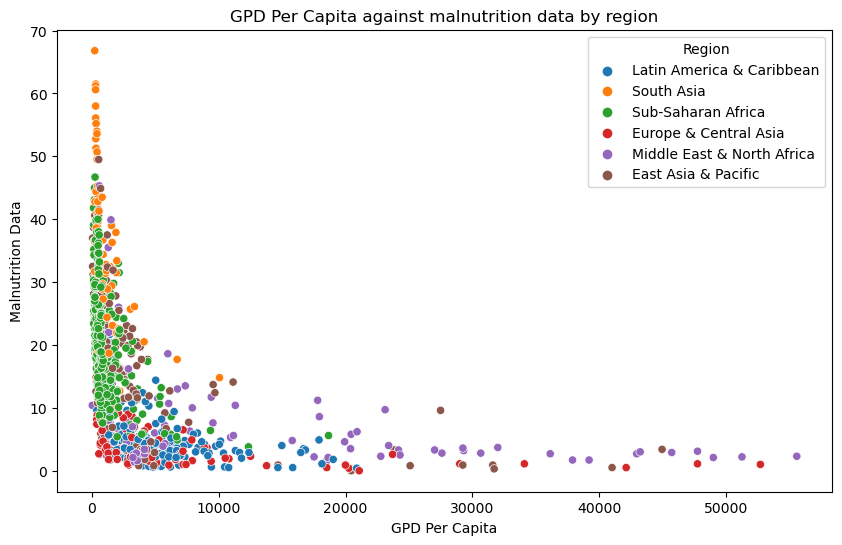

In [11]:
#x.	Plot a scatterplot of GDP data against malnutrition data grouped by geographical regions
plt.figure(figsize=(10,6))
plt.title("GPD Per Capita against malnutrition data by region")
plt.xlabel("GPD Per Capita")
plt.ylabel("Malnutrition Data")
sns.scatterplot(x=country_gdp_trim_melt['GDP'],y=country_ufc_trim_melt['MalnutritionData'], markers='.', hue=country_gdp_trim_melt['Region'])
plt.show()

#### Insights

1. The regions Sub-Saharan Africa, Latin America & Caribbean, and Europe & Central Asia have the lowest GPDs per Capita

2. Some countries in Middle East & North Africa have high GPDs per Capita, likely due to the oil trade in the region. These have the lowest malnutrition rates

3. While the regions Middle East & North Africa and Europe & Central Asia have low GDPs per Capita, they also have low malnutrition rates. This is likely due to the agriculture in these regions

4. South Asia has the highest number of countries with high malnutrition rates, which correlates with the very low GPDs per Capita


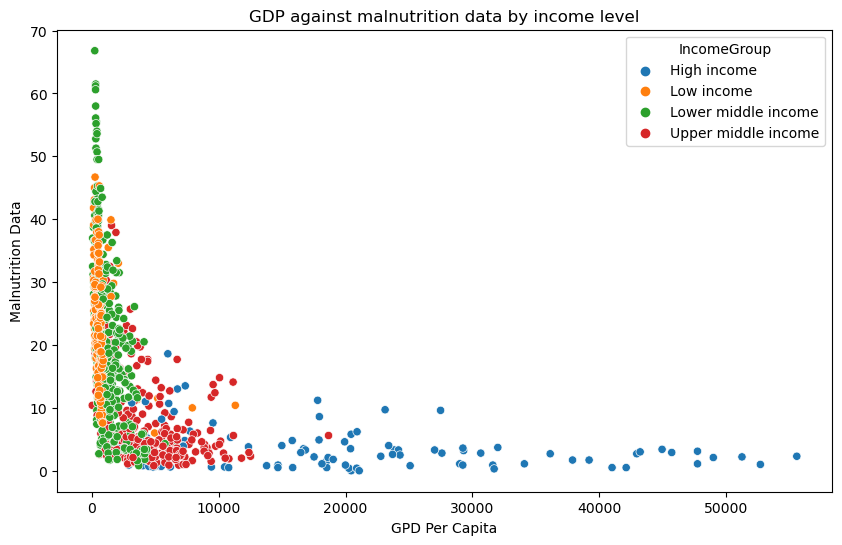

In [12]:
plt.figure(figsize=(10,6))
plt.title("GDP against malnutrition data by income level")
plt.xlabel("GPD Per Capita")
plt.ylabel("Malnutrition Data")
sns.scatterplot(x=country_gdp_trim_melt['GDP'],y=country_ufc_trim_melt['MalnutritionData'], markers='.', hue=country_gdp_trim_melt['IncomeGroup'])
plt.show()

#### Insights

1. Low and Lower middle-income areas have significant rates of malnutrition, with lower middle-income areas having the highest malnutrition rates

2. High income areas have the lowest malnutrition rates

3. Upper middle-income areas have generally low malnutrition rates

### Question Two

Using Quandl, download data, synchronize the time stamps and plot time series for the prices of Crude Oil and Gold in $ on the
same graph. Indicate the maximum and minimum prices in all three time series using coloured dots.

In [37]:
#Configure the API key for accessing the nasdaqdatalink API
nasdaqdatalink.ApiConfig.api_key = "PQVyzUb4YWx1kUZccLQi"

#Use the nasdaqdatalink API to load price data for Crude Oil and Gold
oil_data = nasdaqdatalink.get('WGEC/WLD_CRUDE_WTI')
gold_data = nasdaqdatalink.get('BUNDESBANK/BBK01_WT5511')

In [42]:
#Merge the three dataframes by date and rename the default named columns
all_data_rename = pd.merge(oil_data, gold_data,how="inner", on="Date")
all_data = all_data_rename.rename(columns={"Value_x":"OilData","Value_y":"GoldData"})

In [45]:
#Select the minimum values for Crude Oil and Gold data
min_oil_data = all_data[all_data["OilData"]==all_data["OilData"].min()]
min_gold_data = all_data[all_data["GoldData"]==all_data["GoldData"].min()]

In [47]:
#Select the maximum values for Crude Oil and Gold data
max_oil_data = all_data[all_data["OilData"]==all_data["OilData"].max()]
max_gold_data = all_data[all_data["GoldData"]==all_data["GoldData"].max()]

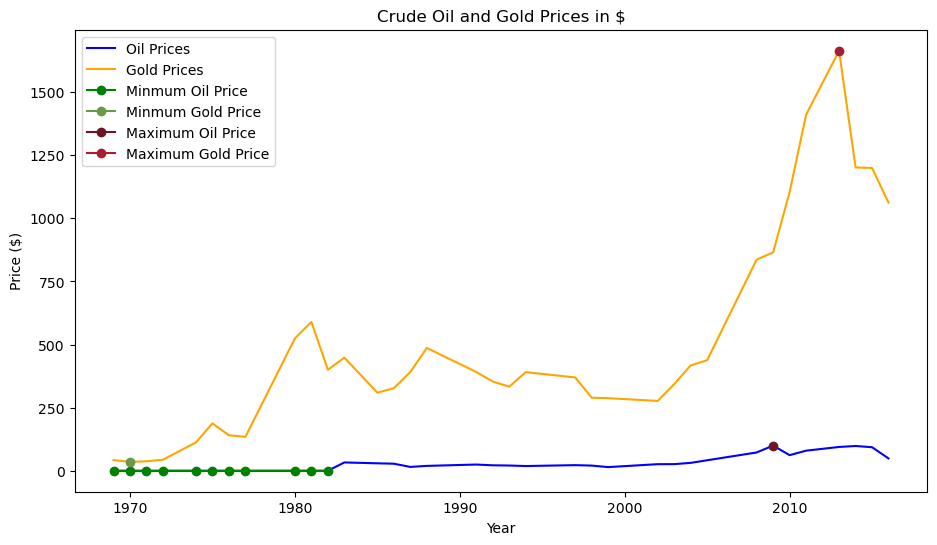

In [48]:
#Plot a time-series graph for the prices of Wheat, Crude Oil and Gold
plt.figure(figsize=(11,6))
plt.title("Crude Oil and Gold Prices in $")
plt.xlabel("Year")
plt.ylabel("Price ($)")
plt.plot(all_data.index, all_data['OilData'], label="Oil Prices", color="blue")
plt.plot(all_data.index, all_data['GoldData'], label="Gold Prices", color="orange")

#Display marks at the minimum prices for Wheat, Crude Oil and Gold
plt.plot(min_oil_data["OilData"], label="Minmum Oil Price", marker="o", color="#008000")
plt.plot(min_gold_data["GoldData"], label="Minmum Gold Price", marker="o", color="#6a994e")

#Display marks at the maximum prices for Wheat, Crude Oil and Gold
plt.plot(max_oil_data["OilData"], label="Maximum Oil Price", marker="o", color="#6e1423")
plt.plot(max_gold_data["GoldData"], label="Maximum Gold Price", marker="o", color="#a71e34")

plt.legend()
plt.show()

#### Insights

1. Among the commodities analyzed, wheat prices consistently maintain the highest values, followed by gold prices and then oil prices.

2. Historical data reveals dips in pricing for these commodities: oil prices reached to their lowest levels in the early 1980s, while gold experienced its own in the early 2000s.

3. All three commodities simultaneously reached their peak prices in the late 2000s, indicating underlying economic factors influencing their respective price surges.

### Question Three

Download “CO2 emissions (metric tons per capita)” data from the World Bank Indicators. Select the emissions for all countries in 2010 and calculate summary statistics. Provide a table giving the mean, median, standard deviation, 5, 25, 75, and 95 percentiles.

In [20]:
#Load CO2 emissions data from the downloaded files
CO2_data = pd.read_csv('Data/CO2_Emissions_Data.csv', skiprows = 4, index_col=1)
CO2_data_filtered = CO2_data[["2010"]]

In [21]:
#Use the mean(), median(), std() and quantile() functions to compute
#the mean, median, standard deviation and 5, 25, 75, and 95 percentiles respectively
#Round off the values to 2 decimal points
CO2_mean = round(CO2_data_filtered.mean().values[0],2)
CO2_median = round(CO2_data_filtered.median().values[0],2)
CO2_sd = round(CO2_data_filtered.std().values[0],2)
CO2_p5 = round(CO2_data_filtered.quantile(0.05).values[0],2)
CO2_p25 = round(CO2_data_filtered.quantile(0.25).values[0],2)
CO2_p75 = round(CO2_data_filtered.quantile(0.75).values[0],2)
CO2_p95 = round(CO2_data_filtered.quantile(0.95).values[0],2)

In [22]:
#Create a dictionary to display the computed data
CO2_data_table = {'CO2 Emission Statistics':['Mean','Median','Standard Deviation','5th Percentile','25th Percentile','75th Percentile','95th Percentile'],
              'Value':[CO2_mean,CO2_median,CO2_sd,CO2_p5,CO2_p25,CO2_p75,CO2_p95]}
CO2_statistics_df = pd.DataFrame(CO2_data_table)
#Set the column 'CO2 Emission Statistics' column as the index
CO2_statistics_df = CO2_statistics_df.set_index('CO2 Emission Statistics')
#Display the summary statistics dataframe
CO2_statistics_df

,Value
CO2 Emission Statistics,
Mean,4.30
Median,2.67
Standard Deviation,5.07
5th Percentile,0.11
25th Percentile,0.76
75th Percentile,5.89
95th Percentile,15.17


### Question Four

The World Bank Indicators provide variables called “Fertility rate, total (births per woman)” and “GDP per capita (current US$)”. Make a scatter plot of Fertility rate versus GDP per capita for all countries in 2010. Produce cumulative distribution functions for the fertility rate variable using data from 1990 and 2010 respectively. Use vertical lines to indicate the mean and median. Use a legend to explain which is the mean and which is the median. Have fertility rates changed over this twenty-year period?

In [24]:
fertility_rate_data = pd.read_csv('Data/Fertility_Rate_Data.csv', skiprows=4)

In [25]:
#Load the data from 2010 into a separate new dataframe
fertility_rate_data_filtered = fertility_rate_data[["2010"]]
#Load the data from question one's GDP dataframe into a separate new dataframe
gdp_data_filtered = gdp_data[["2010"]]

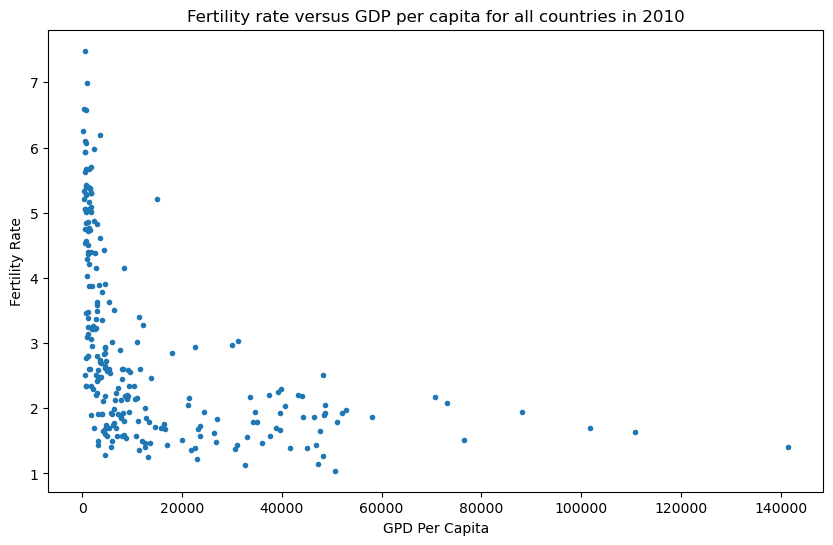

In [26]:
#Plot a scatterplot of Fertility rate versus GDP per capita for all countries in 2010
plt.figure(figsize = (10,6))
plt.title("Fertility rate versus GDP per capita for all countries in 2010")
plt.xlabel("GPD Per Capita")
plt.ylabel("Fertility Rate")
plt.scatter(gdp_data_filtered['2010'],fertility_rate_data_filtered['2010'], marker=".")
plt.show()

In [27]:
#sort the records in the columns for 1990 and 2010 data
fertility_data_1990 = np.sort(fertility_rate_data["1990"])
fertility_data_2010 = np.sort(fertility_rate_data["2010"])

In [28]:
#Compute the cumulative distributions for the sorted data from 1990 and 2010
cummulative_data_1990 = np.cumsum(fertility_data_1990) / np.nansum(fertility_data_1990)
cummulative_data_2010 = np.cumsum(fertility_data_2010) / np.nansum(fertility_data_2010)

In [29]:
#Find the mean from 1990 and 2010 data
mean_1990 = fertility_rate_data["1990"].mean()
mean_2010 = fertility_rate_data["2010"].mean()

#Find the median from 1990 and 2010 data
median_1990 = fertility_rate_data["1990"].median()
median_2010 = fertility_rate_data["2010"].median()

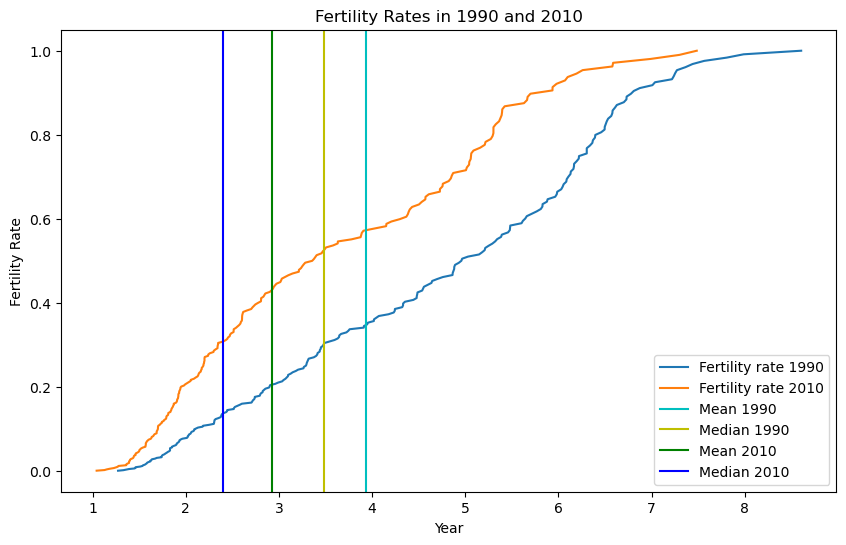

In [30]:
#Plot the cumulative distribution of fertility rate in 1990 and 2010
plt.figure(figsize=(10,6))
plt.title("Fertility Rates in 1990 and 2010")
plt.xlabel("Year")
plt.ylabel("Fertility Rate")
plt.plot(fertility_data_1990,cummulative_data_1990, label = "Fertility rate 1990")
plt.plot(fertility_data_2010,cummulative_data_2010, label = "Fertility rate 2010")

#Display vertical lines at the mark of the mean and median in 1990
plt.axvline(x = mean_1990, color = 'c', label = "Mean 1990")
plt.axvline(x = median_1990, color = 'y', label = "Median 1990")

#Display vertical lines at the mark of the mean and median in 2010
plt.axvline(x = mean_2010, color = 'g', label = "Mean 2010")
plt.axvline(x = median_2010, color = 'b', label = "Median 2010")

plt.legend()
plt.show()

#### Insights

Fertility rates increase over time, but the fertility rate in 2010 is always higher than that in 1990. There are a number of possible explanations for this decline in fertility rates. Some possible explanations include:

 - Increased access to family planning services
 - Later age at marriage
 - Increased urbanization
 - Higher levels of education for women
 
The decline in fertility rates has a number of implications for the future, including:

- Slower population growth
 - Aging populations
 - Changes in the labor force

### Question Five

Download the data for the “Happy Planet Index” from hpi_data and “Corruption Perceptions Index” from https://www.transparency.org/en/cpi/2016/index/nzl. Both datasets are available as excel spread-sheets. Find matching countries for both indices and make a carefully labelled scatter plot of HPI against CPI to demonstrate the relationship using ranks in both cases. Are there any countries that stand out as being unusual?

In [32]:
#Load the Happy Planet Index data from the downloaded files
hpi_data = pd.read_excel('Data/hpi_data_2016.xlsx',4,skiprows=5)
#Select the 'HPI Rank' and 'Country' columns
hpi_data_trim = hpi_data[["HPI Rank","Country"]]

In [33]:
#Load the Corruption Perceptions Index data from the downloaded files
corruptions_index_data = pd.read_excel('Data/CPI2016_Results.xlsx')
#Select the 'HPI Rank' and 'Country' columns
corruptions_index_data_trim = corruptions_index_data[["Country","Rank","WB Code"]]

C:\Users\Sama\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


In [34]:
#Merge the HPI and CPI dataframes into one dataframe
corruptions_hpi_data = pd.merge(hpi_data_trim,corruptions_index_data_trim, on="Country")

In [35]:
corruptions_hpi_data

,HPI Rank,Country,Rank,WB Code
0,110.0,Afghanistan,169,AFG
1,13.0,Albania,83,ALB
2,30.0,Algeria,108,DZA
3,19.0,Argentina,95,ARG
4,73.0,Armenia,113,ARM
...,...,...,...,...
127,29.0,Venezuela,166,VEN
128,5.0,Vietnam,113,VNM
129,94.0,Yemen,170,YEM
130,77.0,Zambia,87,ZMB


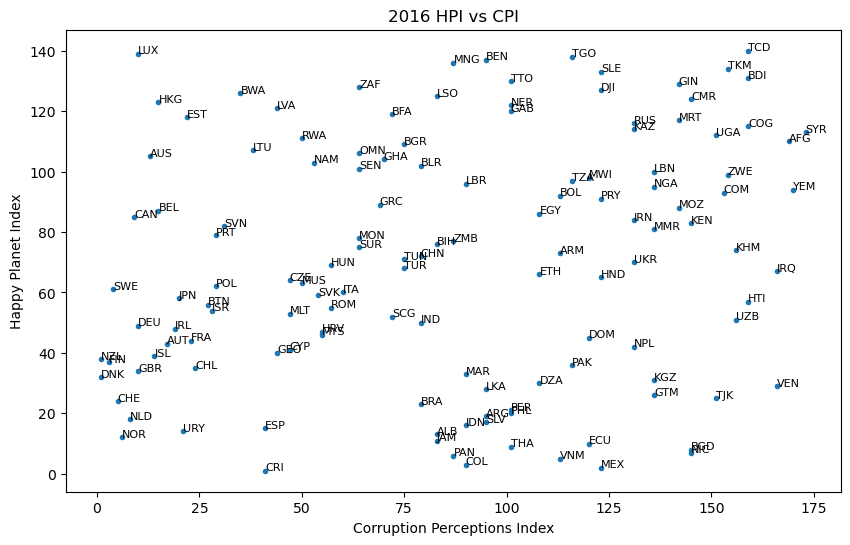

In [36]:
#Plot a scatterplot of HPI against CPI
plt.figure(figsize = (10,6))
plt.title("2016 HPI vs CPI")
plt.xlabel("Corruption Perceptions Index")
plt.ylabel("Happy Planet Index")
plt.scatter(corruptions_hpi_data['Rank'],corruptions_hpi_data['HPI Rank'], marker=".")

#Using a for-loop, add text at every data point on the scatter plot to annotate the country displayed
for index,row in corruptions_hpi_data.iterrows():
    plt.text(row['Rank'],row['HPI Rank'],row['WB Code'],fontsize=8)
    
plt.show()

#### Insights

The Happy Planet Index offers a unique perspective on well-being, taking into account not just economic prosperity but also environmental sustainability and overall life satisfaction. It's intriguing to note that despite their affluent status, some European countries surprisingly rank low on the HPI. For example Luxembourg, a nation known for its economic prosperity and high standard of living, finds itself with a comparatively low HPI ranking. This phenomenon challenges conventional assumptions about the correlation between economic wealth and happiness.

In contrast, there are numerous Asian and African countries that outperform expectations on the HPI despite facing significant economic challenges. These nations, often categorized as third-world or developing countries, exhibit high levels of happiness and well-being relative to their economic conditions. This underscores the importance of factors beyond GDP in determining the overall quality of life.

The stark disparities between economic wealth and well-being across regions highlight the diverse nature of prosperity. While economic development undoubtedly plays a crucial role, it's clear that other factors such as social bonds and community resilience also significantly contribute to overall happiness. Understanding these differences can inform more better approaches to development and policy-making, aimed at fostering genuine well-being for all citizens, regardless of their economic standing.